In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
import numpy as np
#넘파이의 column_stack을 이용해서 두개의 배열을 합쳐줌
print(np.column_stack(([1,2,3],[4,5,6])))
print(np.row_stack(([1,2,3],[4,5,6])))
print(np.concatenate(([1,2,3],[4,5,6])))

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [6]:
fish_data=np.column_stack((fish_length,fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
np.full((2,3),9)

array([[9, 9, 9],
       [9, 9, 9]])

In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 데이터 나누기


In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input,train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)# 인풋(트레인,테스트), 타겟(트레인, 테스트), 2개배열 - 4개로, 3개배열 - 6개로 나눠줌
#stratify 케이스 작을때 고르게 분류되도록, 순서 지키기!!


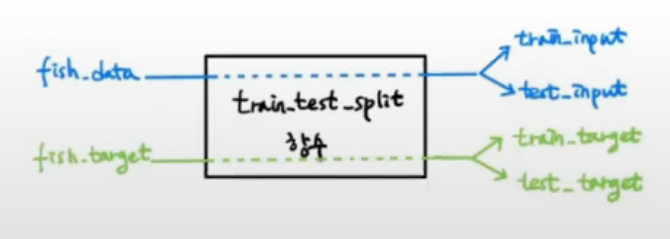

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
print(kn.predict([[25,150]]))#수상한 도미가 빙어로 분류

[0.]


In [18]:
distances, indexes = kn.kneighbors([[25,150]])
#가장가까운 5개 샘플까지의 거리와 인덱스
indexes

array([[21, 33, 19, 30,  1]])

Text(0, 0.5, 'weigth')

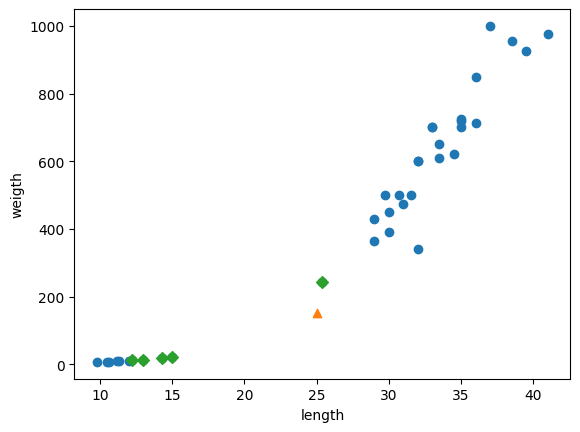

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')#25cm, 150g의 수상한 도미를 삼각형으로 표시
plt.scatter(train_input[indexes,0], train_input[indexes,1],
            marker='D')#최근접 샘플을 표시
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

##기준을 맞춰라
x축과 y축의 스케일이 맞지 않기 때문에 문제가 생김
(트리-스케일과 무관)

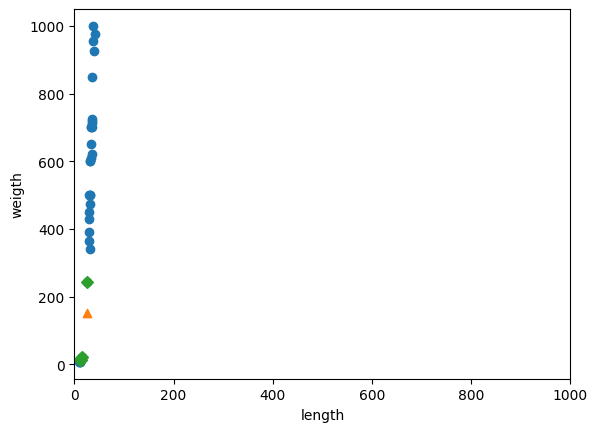

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],
            marker='D')
plt.xlabel('length')
plt.ylabel('weigth')

plt.xlim((0,1000))#xlim, 축의 범위 지정 함수
plt.show()

##표준 점수로 바꾸기
(특성 - 평균)/표준편차  
사이킷런에 있지만 직접 한번 해보기

In [ ]:
mean = np.mean(train_input, axis=0)#axis=0 행 따라 쭉 계산,axis=1은 행마다 평균 계산
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std
#넘파이 브로드캐스팅, mean,std 는 (1,2)의 배열이고 train_input은(36,2)의 배열이지만
#36개 모두에서 다 계산해준다. 메모리 효율적.

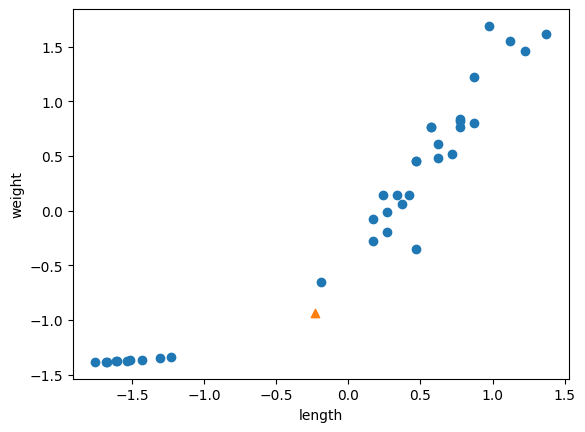

In [ ]:
new = ([25,150]-mean) / std
#훈련세트에서 전처리했으면,
#테스트세트나 예측하려는 값도 전처리 해야함
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean)/std #테스트 데이터도 표준화
kn.score(test_scaled, test_target)

1.0

In [ ]:
kn.predict([new]) #도미로 제대로 분류

array([1.])

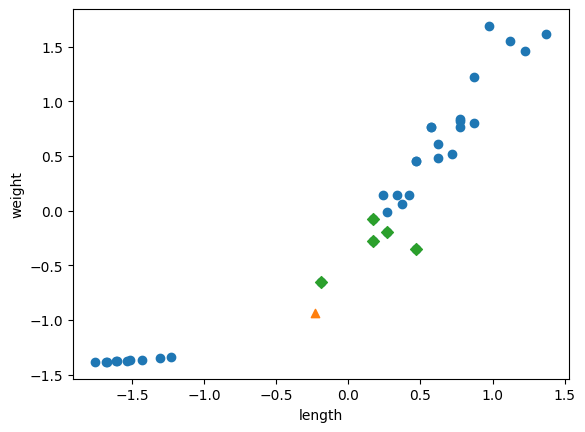

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()